<a href="https://colab.research.google.com/github/Jhanvi-ctrl/EDA-of-Zomato-Restaurants/blob/main/Zomato_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df=df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'], axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51609 non-null  object 
 1   online_order     51609 non-null  object 
 2   book_table       51609 non-null  object 
 3   rate             51609 non-null  float64
 4   votes            51609 non-null  int64  
 5   location         51588 non-null  object 
 6   rest_type        51382 non-null  object 
 7   cuisines         51564 non-null  object 
 8   Cost2plates      51265 non-null  object 
 9   Type             51609 non-null  object 
 10  listed_in(city)  51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [17]:
#Droping duplicates
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [16]:
#Cleaning rate column
df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.70044882, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [6]:
def handlerate(value):
  if(value=='NEW' or value=='-'):
    return np.nan
  else:
    value=str(value).split('/')
    value=value[0]#0 index value
    return float(value)
df['rate']=df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [54]:
#Finding null values
df.rate.isnull().sum()

0

In [55]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df.rate.isnull().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51717 non-null  object 
 1   online_order     51717 non-null  object 
 2   book_table       51717 non-null  object 
 3   rate             41665 non-null  float64
 4   votes            51717 non-null  int64  
 5   location         51696 non-null  object 
 6   rest_type        51490 non-null  object 
 7   cuisines         51672 non-null  object 
 8   Cost2plates      51371 non-null  object 
 9   Type             51717 non-null  object 
 10  listed_in(city)  51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [ ]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [21]:
df.rename(columns={'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [22]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [19]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [23]:
dh=df.drop(['listed_in(city)'],axis=1)
dh.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [24]:
dh['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [25]:
def handlecomma(value):
  value=str(value)
  if ',' in value:
    value=value.replace(',','')
    return float(value)
  else:
    return float(value)
dh['Cost2plates']=dh['Cost2plates'].apply(handlecomma)
dh['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [ ]:
#cleaning rest type of column
dh['rest_type'].value_counts()

Quick Bites                   14981
Casual Dining                  9859
Cafe                           3487
Dessert Parlor                 1923
Delivery                       1775
                              ...  
Bakery, Food Court                2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Name: rest_type, Length: 87, dtype: int64

In [26]:
rest_types=dh['rest_type'].value_counts(ascending=True)
rest_types

Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Cafe, Food Court                  2
                              ...  
Dessert Parlor                 2260
Delivery                       2600
Cafe                           3727
Casual Dining                 10309
Quick Bites                   19096
Name: rest_type, Length: 93, dtype: int64

In [ ]:
rest_types_lessthen1000 = rest_types[rest_types<1000]
rest_types_lessthen1000

Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Dessert Parlor, Food Court      2
Food Court, Beverage Shop       2
Cafe, Food Court                2
                             ... 
Bar, Casual Dining            425
Sweet Shop                    468
Food Court                    624
Bar                           697
Beverage Shop                 867
Name: rest_type, Length: 85, dtype: int64

In [ ]:
def handle_rest_type(value):
  if(value in rest_types_lessthen1000):
      return 'others'
  else:
    return value
dh['rest_type']=dh['rest_type'].apply(handle_rest_type)
dh['rest_type'].value_counts()

Quick Bites           14981
Casual Dining          9859
others                 8853
Cafe                   3487
Dessert Parlor         1923
Delivery               1775
Takeaway, Delivery     1452
Casual Dining, Bar     1117
Name: rest_type, dtype: int64

In [ ]:
#cleaning location
df['location'].value_counts()

BTM                      4201
Koramangala 5th Block    2356
HSR                      2100
Indiranagar              1882
JP Nagar                 1841
                         ... 
West Bangalore              5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [27]:
location=dh['location'].value_counts(ascending=False)
location_lessthan300=location[location<300]
def handle_location(value):
  if(value in location_lessthan300):
      return 'others'
  else:
    return value
dh['location']=dh['location'].apply(handle_location)
dh['location'].value_counts()

BTM                      5109
others                   4699
HSR                      2521
Koramangala 5th Block    2502
JP Nagar                 2234
Whitefield               2140
Indiranagar              2075
Jayanagar                1926
Marathahalli             1843
Bannerghatta Road        1628
Bellandur                1283
Electronic City          1256
Koramangala 1st Block    1237
Brigade Road             1210
Koramangala 7th Block    1179
Koramangala 6th Block    1154
Sarjapur Road            1063
Koramangala 4th Block    1017
Ulsoor                   1017
MG Road                   917
Banashankari              904
Kalyan Nagar              853
Richmond Road             811
Malleshwaram              722
Frazer Town               720
Basavanagudi              684
Residency Road            672
Banaswadi                 659
Brookefield               658
New BEL Road              649
Kammanahalli              647
Rajajinagar               591
Church Street             566
Lavelle Ro

In [28]:
cuisines=dh['cuisines'].value_counts(ascending=False)
cuisines_lessthan100=cuisines[cuisines<100]
def handle_cuisines(value):
  if(value in cuisines_lessthan100):
      return 'others'
  else:
    return value
dh['cuisines']=dh['cuisines'].apply(handle_cuisines)
dh['cuisines'].value_counts()

others                                 26397
North Indian                            2907
North Indian, Chinese                   2381
South Indian                            1826
Biryani                                  915
                                       ...  
South Indian, Chinese, North Indian      105
Italian, Pizza                           105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [ ]:
dh.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
dh['Type'].value_counts()

Delivery              20452
Dine-out              14066
Desserts               2709
Cafes                  1511
Drinks & nightlife     1045
Buffet                  848
Pubs and bars           632
Name: Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Sarjapur Road'),
  Text(11, 0, 'Shanti Nagar'),
  Text(12, 0, 'Koramangala 5th Block'),
  Text(13, 0, 'Koramangala 8th Block'),
  Text(14, 0, 'Richmond Road'),
  Text(15, 0, 'Koramangala 7th Block'),
  Text(16, 0, 'Koramangala 4th Block'),
  Text(17, 0, 'Bellandur'),
  Text(18, 0, 'Whitefield'),
  Text(19, 0, 'Old Airport Road'),
  Text(20, 0, 'Indiranagar'),
  Text(21, 0, 'Koramangala 1st Block'),
  Text(22, 0, 'Frazer Town'),
  Text(23, 0, 'MG Road'),
  Text(24, 0, 'Brigade Road'),
  Text(25, 0, 'Lavell

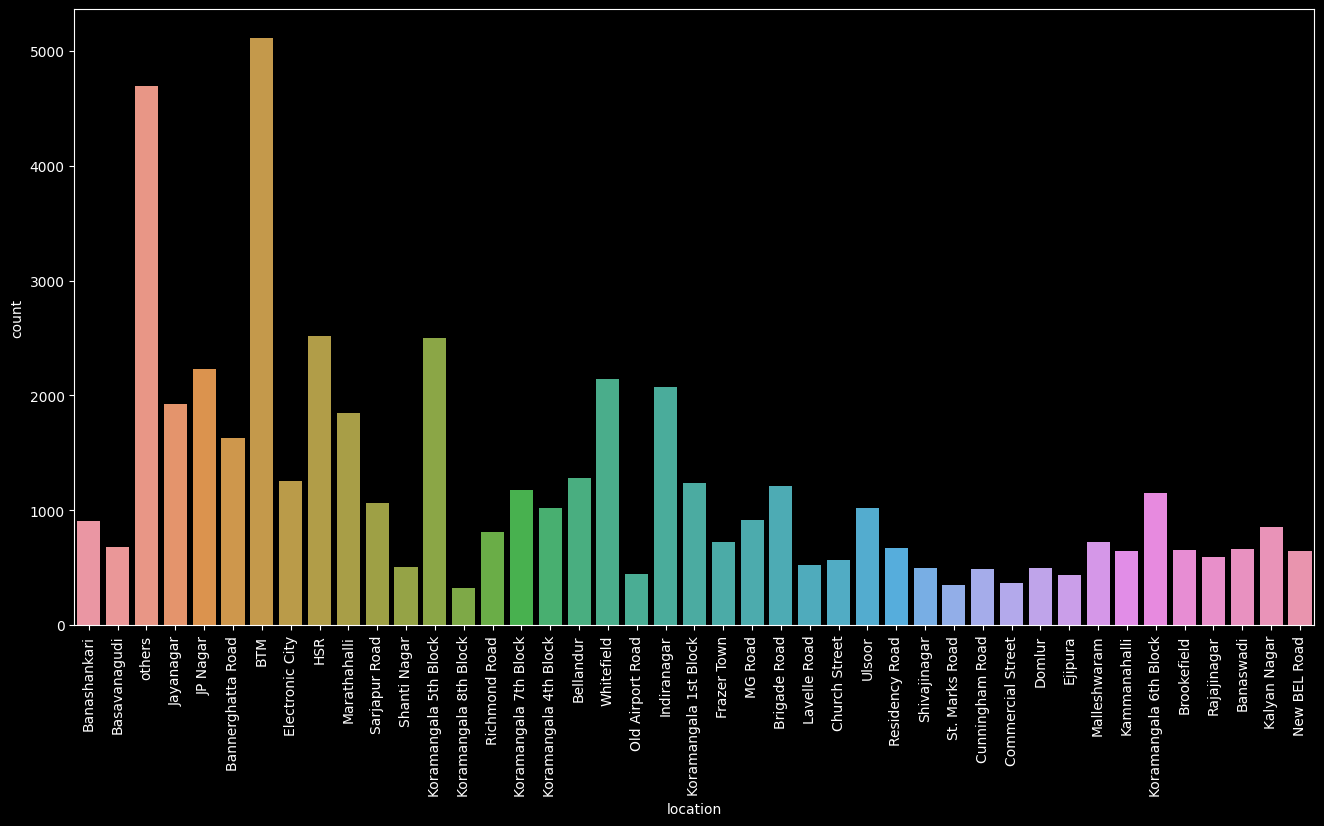

In [29]:
#count plot for various location
plt.figure(figsize=(16,8))
ax=sns.countplot(data= dh, x='location')
plt.xticks(rotation=90)

<Axes: xlabel='online_order', ylabel='count'>

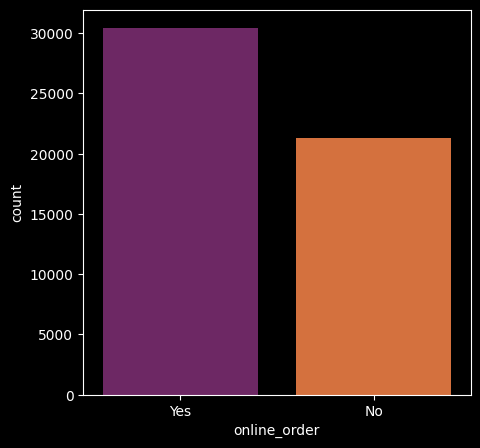

In [ ]:
#visualizing online order
plt.figure(figsize=(5,5))
sns.countplot(data=dh, x='online_order', palette= 'inferno')

<Axes: xlabel='book_table', ylabel='count'>

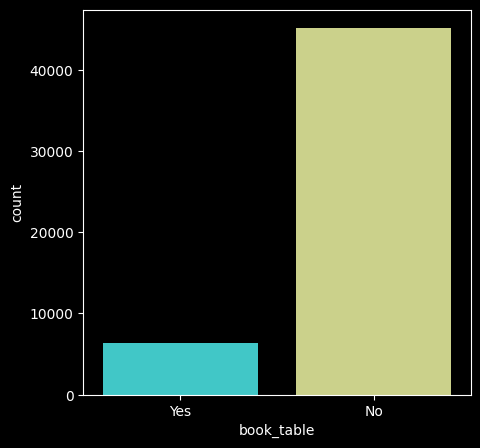

In [32]:
#visualizibg book table
plt.figure(figsize=(5,5))
sns.countplot(data=dh,x='book_table', palette='rainbow')

<Axes: xlabel='online_order', ylabel='rate'>

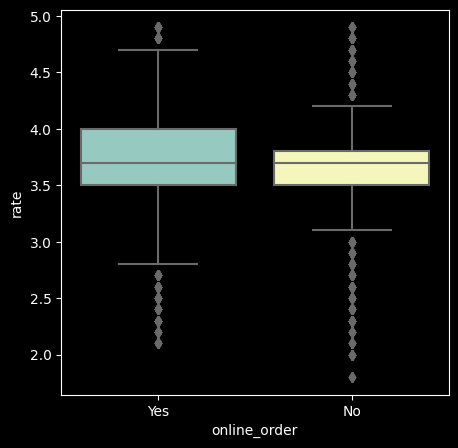

In [30]:
#visualizing online order vs rate
plt.figure(figsize=(5,5))
sns.boxplot(x ="online_order", y ="rate", data=dh)

<Axes: xlabel='book_table', ylabel='rate'>

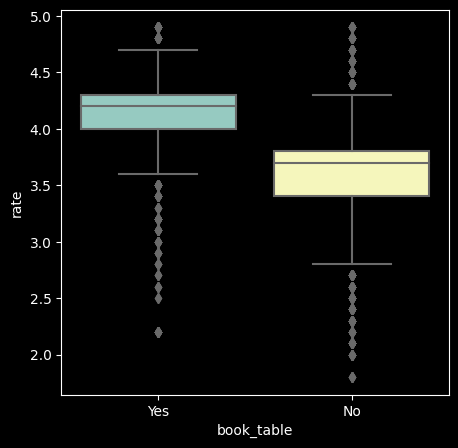

In [34]:
#visualizing book table vs rate
plt.figure(figsize=(5,5))
sns.boxplot(x = 'book_table', y ='rate', data=dh)

In [35]:
#visualizing online order facility, location wise
df1= dh.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1, values= None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1789  3320
Banashankari            397   507
Banaswadi               321   338
Bannerghatta Road       704   924
Basavanagudi            243   441
Bellandur               523   760
Brigade Road            552   658
Brookefield             241   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  261   235
Ejipura                 219   219
Electronic City         681   575
Frazer Town             293   427
HSR                     602  1919
Indiranagar             743  1332
JP Nagar                917  1317
Jayanagar               562  1364
Kalyan Nagar            355   498
Kammanahalli            267   380
Koramangala 1st Block   385   852
Koramangala 4th Block   459   558
Koramangala 5th Block   889  1613
Koramangala 6th Block   457   697
Koramangala 7th Block   394   785
Koramangala 8th Block   108   212
Lavelle Road            321   203
MG Road                 544   373
Malleshwaram            310   412
Marathahalli            734  1109
New BEL Road            257   392
Old Airport Road        230   216
Rajajinagar             286   305
Residency Road          425   247
Richmond Road           565   246
Sarjapur Road           335   728
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          185   167
Ulsoor                  395   622
Whitefield             1005  1135
others                 2008  2691

<Axes: xlabel='location'>

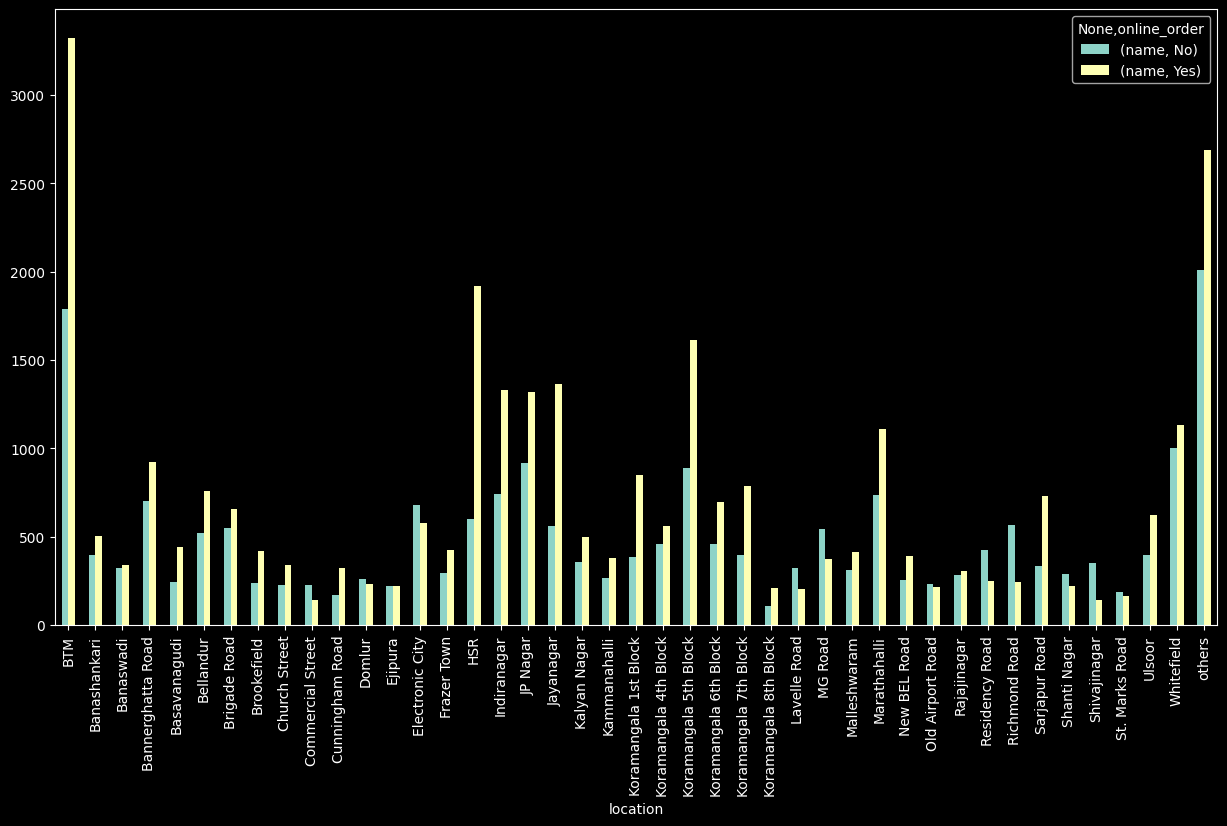

In [36]:
df1.plot(kind='bar', figsize=(15,8))

In [ ]:
#visualizing book table facility, location wise
df2= dh.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2=pd.read_csv('location_booktable.csv')
df2=pd.pivot_table(df2, values= None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    3725  154
Banashankari            691   53
Banaswadi               460    8
Bannerghatta Road      1128   98
Basavanagudi            579   16
Bellandur               899   98
Brigade Road            878  174
Brookefield             471   72
Church Street           364  182
Cunningham Road         300  175
Domlur                  351   55
Electronic City         737   97
Frazer Town             558    8
HSR                    1785  208
Indiranagar            1368  432
JP Nagar               1422  288
Jayanagar              1365  269
Kalyan Nagar            549  143
Kammanahalli            444   49
Koramangala 1st Block   802   50
Koramangala 4th Block   531  310
Koramangala 5th Block  1627  670
Koramangala 6th Block   941  113
Koramangala 7th Block   891  164
Lavelle Road            249  232
MG Road                 446  347
Malleshwaram            552   89
Marathahalli           1244  166
New BEL Road            450   56
Old Airport Road        294   59
Rajajinagar             420   41
Residency Road          453  151
Richmond Road           488  116
Sarjapur Road           699  155
Shanti Nagar            310   58
St. Marks Road          219  124
Ulsoor                  672  177
Whitefield             1316  252
others                 4281  395

<Axes: xlabel='location'>

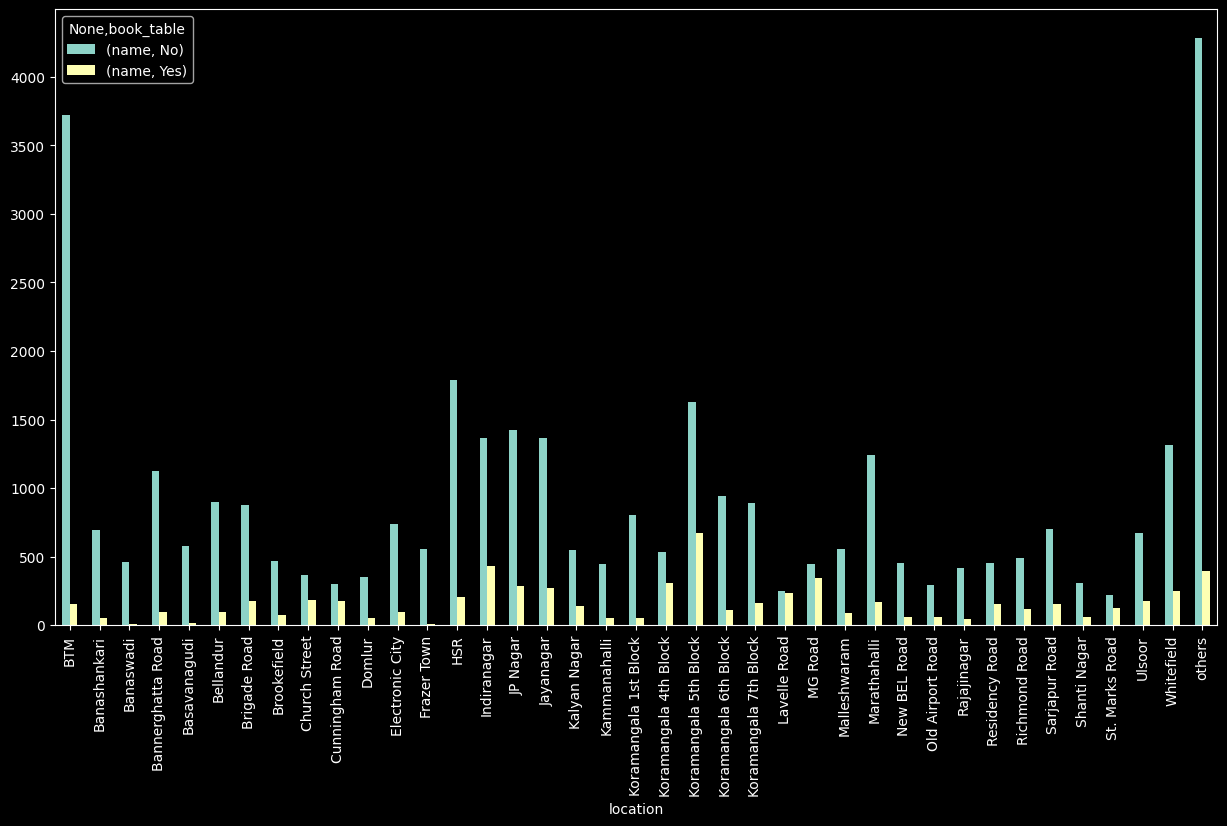

In [ ]:
df2.plot(kind='bar', figsize=(15,8))

<function matplotlib.pyplot.box(on=None)>

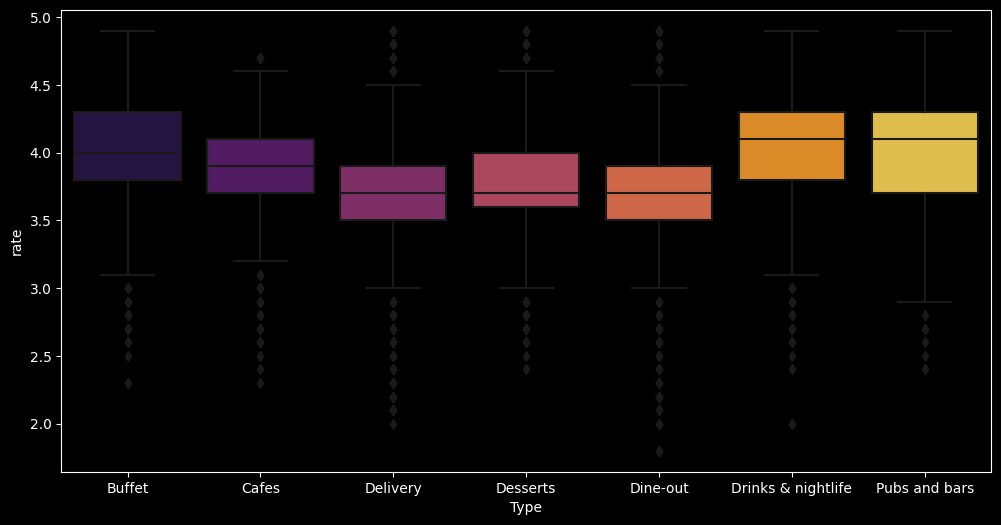

In [37]:
#visuaizing types of resturant
plt.figure(figsize=(12,6))
box= sns.boxplot(x = 'Type', y = 'rate', data = dh, palette= 'inferno')
plt.box

In [ ]:
#grouping types of resturant location wise
df3= dh.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3=pd.read_csv('location_booktable.csv')
df3=pd.pivot_table(df3, values= None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       18    71     2438      125     1195   
Banashankari               7    36      347       57      284   
Banaswadi                  0    20      228       25      188   
Bannerghatta Road          9    37      639       83      447   
Basavanagudi               7    11      301       52      219   
Bellandur                 28    31      467       58      380   
Brigade Road              25    41      430       83      393   
Brookefield                6    17      277       37      202   
Church Street             19    46      188       29      213   
Cunningham Road           29    28      191       26      178   
Domlur                    15    13      218       27      110   
Electronic City           21    18      357       46      353   
Frazer Town                1    10      363       49      139   
HSR                       16    45     1351       94      458   
Indiranagar               36    92      963      124      462   
JP Nagar                  42    66      873      124      555   
Jayanagar                 24    72      904      136      486   
Kalyan Nagar               9    37      289       64      275   
Kammanahalli               2    21      261       21      182   
Koramangala 1st Block      3    21      510       41      262   
Koramangala 4th Block     21    53      359       56      260   
Koramangala 5th Block     60   146      966      200      790   
Koramangala 6th Block     18    40      469       70      383   
Koramangala 7th Block     25    44      448      102      388   
Lavelle Road              30    22      117       43      183   
MG Road                   51    76      214       56      312   
Malleshwaram              11    29      234       70      263   
Marathahalli              34    26      763       75      486   
New BEL Road               4    25      265       26      170   
Old Airport Road          12     4      159       29      128   
Rajajinagar               10     3      203       40      192   
Residency Road            20    26      155       53      268   
Richmond Road             63    16      187       50      260   
Sarjapur Road             26    14      447       70      256   
Shanti Nagar               9    18      152       29      149   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    50      381       54      309   
Whitefield                26    47      738       91      590   
others                    90   129     2489      284     1553   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   19            13  
Banashankari                          13             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          58            22  
Brookefield                            4             0  
Church Street                         31            20  
Cunningham Road                       16             7  
Domlur                                12            11  
Electronic City                       20            19  
Frazer Town                            2             2  
HSR                                   12            17  
Indiranagar                           63            60  
JP Nagar                              44             6  
Jayanagar                             12             0  
Kalyan Nagar                          18             0  
Kammanahalli                           6             0  
Koramangala 1st Block                  

<Axes: xlabel='location'>

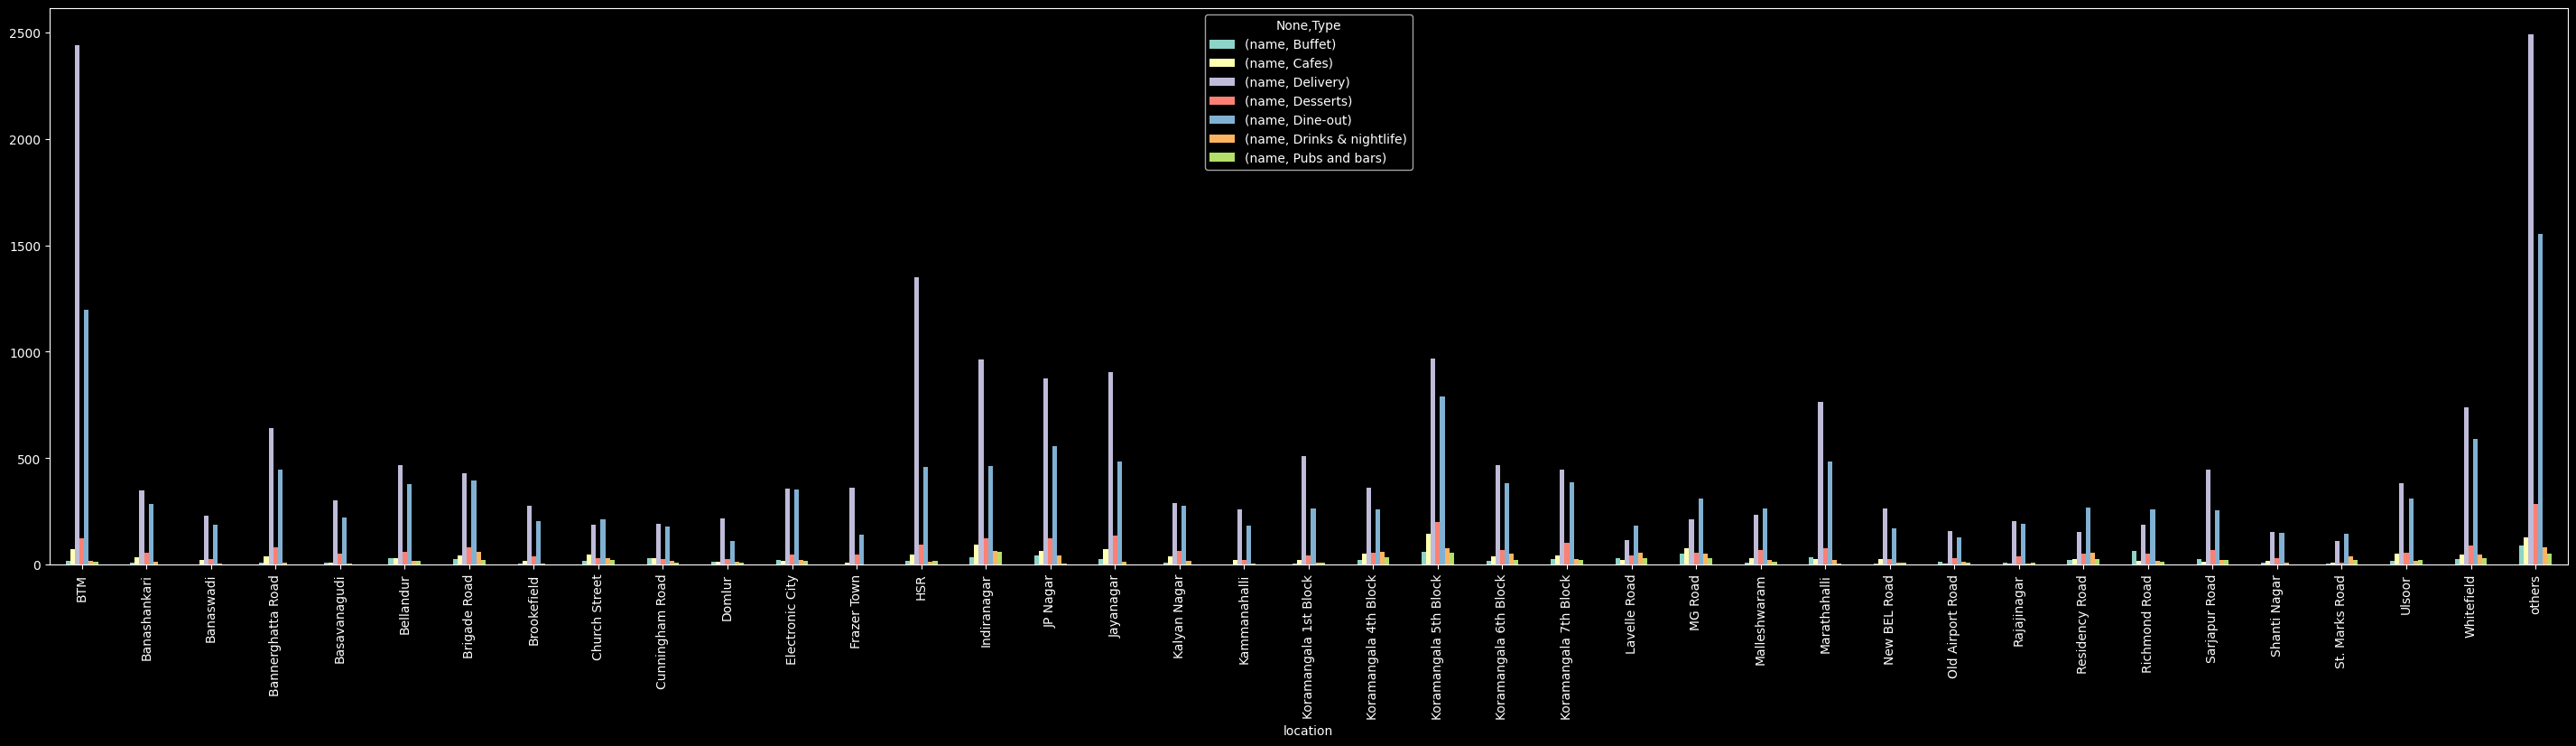

In [ ]:
df3.plot(kind='bar', figsize=(36,8))

In [39]:
#No. of votes location wise
df4=dh[['location','votes']]
df4.drop_duplicates()
df5=df4.groupby(['location'])['votes'].sum()
df5=df5.to_frame()
df5=df5.sort_values('votes', ascending= False)
df5.head()

,votes
location,
Koramangala 5th Block,2218762
Indiranagar,1188487
Koramangala 4th Block,685156
BTM,618986
Church Street,590306


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'BTM'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Roa

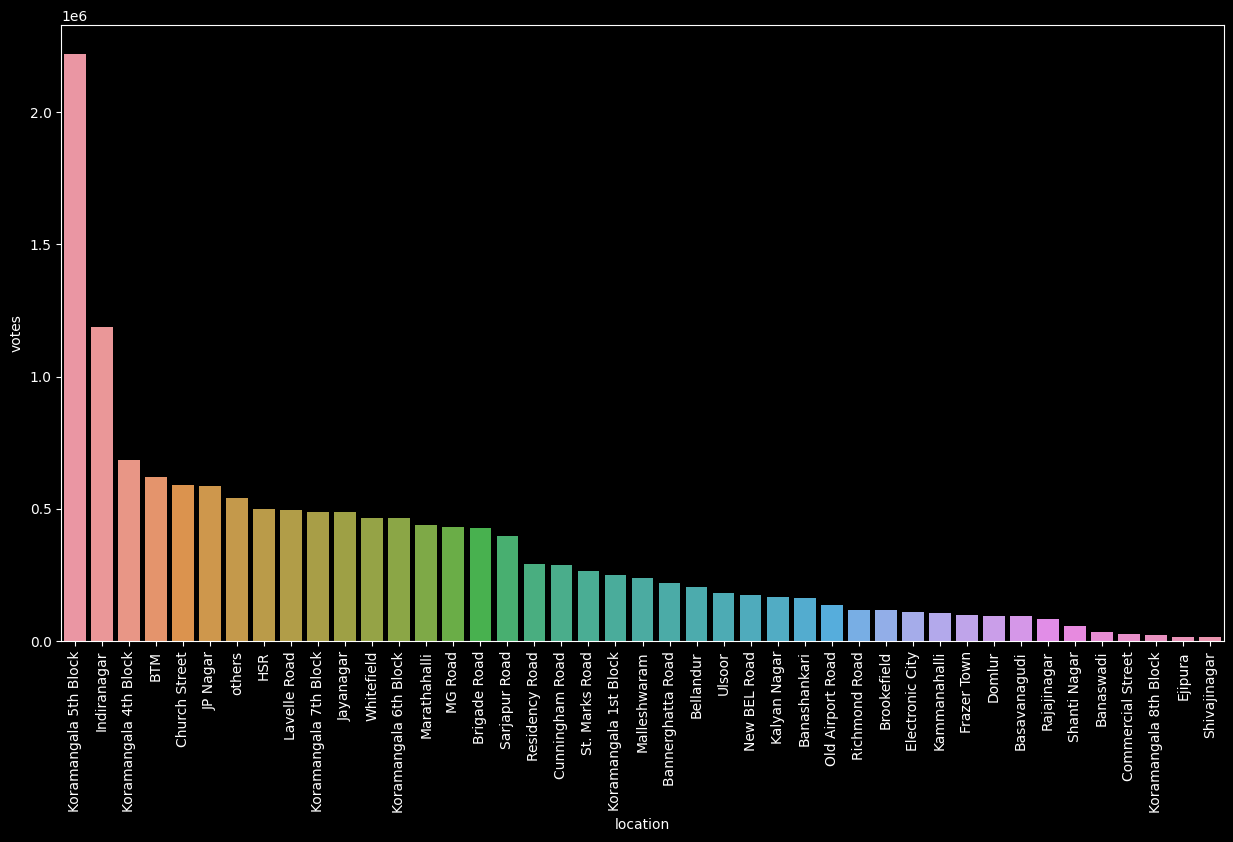

In [47]:
plt.figure(figsize=(15,8))
sns.barplot(data= df5, x=df5.index, y='votes')
plt.xticks(rotation=90)


In [43]:
#visualizing top cuisines
df6=dh[['cuisines','votes']]
df6.drop_duplicates()
df7=df6.groupby(['cuisines'])['votes'].sum()
df7=df7.to_frame()
df7=df7.sort_values('votes', ascending= False)
df7.head()

,votes
cuisines,
others,11572666
North Indian,558618
"North Indian, Chinese",259502
South Indian,161983
"North Indian, Mughlai",103706


In [44]:
df7=df7.iloc[1:,:]
df7.head()

,votes
cuisines,
North Indian,558618
"North Indian, Chinese",259502
South Indian,161983
"North Indian, Mughlai",103706
Chinese,101728


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

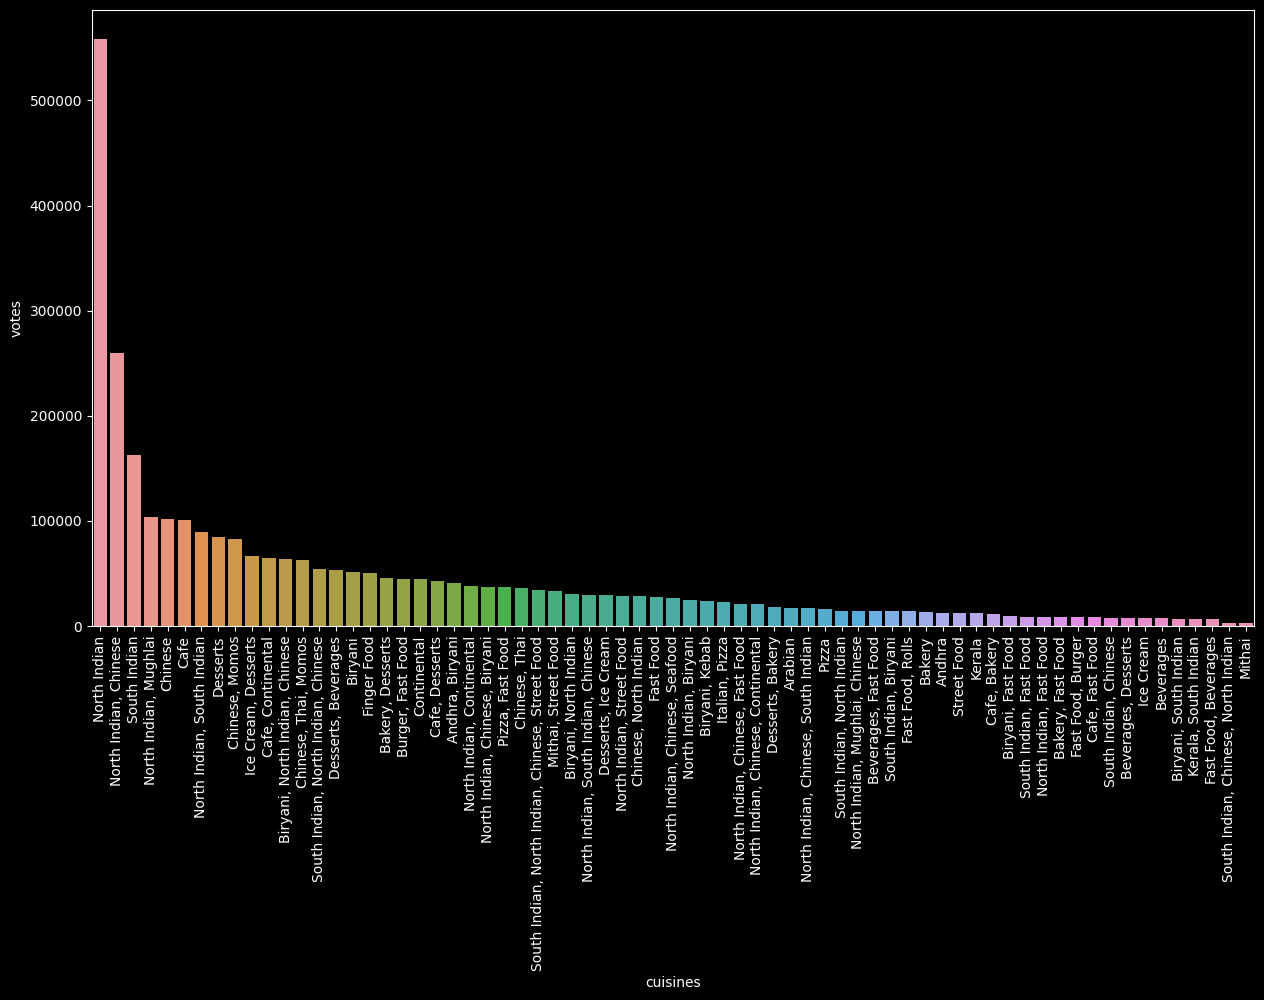

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(data= df7, x=df7.index, y='votes')
plt.xticks(rotation=90)